In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Transition Matrix

In [3]:
P = np.array([[  0, 1/3, 1/4,   0,   0,   0],
              [1/2,   0, 1/4, 1/4,   0,   0],
              [1/2, 1/3,   0, 1/4, 1/3,   0],
              [  0, 1/3, 1/4,   0, 1/3, 1/2],
              [  0,   0, 1/4, 1/4,   0, 1/2],
              [  0,   0,   0, 1/4, 1/3,   0]]);

## Stationary Distribution via Eigenvalues

In [9]:
es, vs = np.linalg.eig(P)
i = np.argmax(np.isclose(es, 1.0))
v = vs[:, i]
v = v / sum(v)
print(v)

[ 0.11111111  0.16666667  0.22222222  0.22222222  0.16666667  0.11111111]


## Visualize powers of the transition matrix

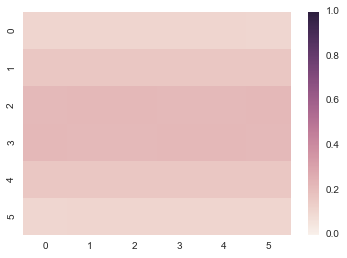

In [5]:
sns.heatmap(np.linalg.matrix_power(P, 10), vmin = 0, vmax = 1)
plt.show()

## Detailed Balance

Detailed balance condition is expressed as $P_{ji} \pi_i = P_{ij} \pi_j$, where $\pi$ is the stationary distribution and $P$ is the transition matrix.

In [11]:
x = np.dot(P, np.diag(v)) # shortcut: x = P*v
print(x)

[[ 0.          0.05555556  0.05555556  0.          0.          0.        ]
 [ 0.05555556  0.          0.05555556  0.05555556  0.          0.        ]
 [ 0.05555556  0.05555556  0.          0.05555556  0.05555556  0.        ]
 [ 0.          0.05555556  0.05555556  0.          0.05555556  0.05555556]
 [ 0.          0.          0.05555556  0.05555556  0.          0.05555556]
 [ 0.          0.          0.          0.05555556  0.05555556  0.        ]]


In [12]:
# x.T = x.transpose()
np.isclose(x, x.T).all()

True

## Simulation

In [45]:
def simulate(P, N):
    chain = np.zeros(N).astype(int)
    chain[0] = 0
    for i in range(1,N):
        pr = P[:, chain[i-1]]
        chain[i] = np.random.choice(range(6), p = pr)

    return(chain)

In [46]:
chain = simulate(P, int(1e4))

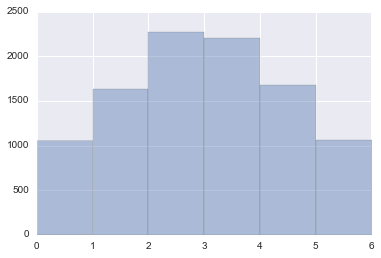

In [47]:
nburnin = 100
sns.distplot(chain[nburnin:], kde = False, bins=[0,1,2,3,4,5,6])
plt.show()

## Independent samples

In [48]:
nchains = 10000
chain_length = 50
samples = np.zeros([nchains, chain_length]).astype(int)
for i in range(0, nchains):
    ch = simulate(P, chain_length)
    samples[i,:] = ch

In [29]:
xx = np.apply_along_axis(lambda x: np.histogram(x, bins=[0,1,2,3,4,5,6], density = True)[0], 0, samples)

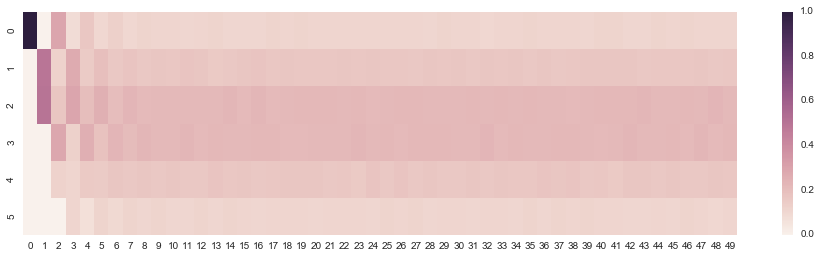

In [30]:
plt.figure(figsize=(16, 4))
sns.heatmap(xx)
plt.show()

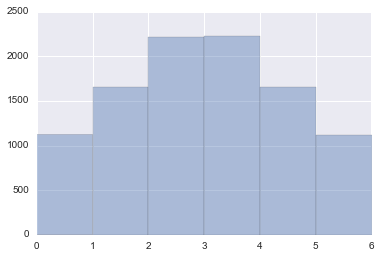

In [36]:
sns.distplot(samples[:, chain_length-1], kde = False, bins = [0,1,2,3,4,5,6])
plt.show()